[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/How-to-Learn-to-Code/python-class/blob/master/Lesson_7_Plotting/plotting_teacher.ipynb)


# Lesson 7: Plotting

## Learning Objectives

Students will be introduced to `matplotlib` and will learn how to make and customize simple plots. 

* [Introduction to `matplotlib`](#introduction-to-matplotlib)
* [Basics of Plotting](#basics-of-plotting)
* [Different Types of Plots](#different-types-of-plots)
* [`matplotlib` Figure and Axes](#matplotlib-axes)
* [In-Class Exercises](#in-class-exercises)

### Introduction to `matplotlib` <a id="introduction-to-matplotlib"></a>

`matplotlib` is a Python library used for visualizing data. The [website](https://matplotlib.org/stable/users/index) has a helpful user guide that contains documentation, information on how to get started (including package installation), an overview of plot types, and tutorials. If you are ever stuck or need help figuring out how to make the plot you have in mind, this website is a great place to start.

Most of the functions that people use from the `matplotlib` library are in the `pyplot` submodule, and to make it easier to access those functions, it is usually imported as `plt`. 

In [1]:
%pip install matplotlib
import matplotlib.pyplot as plt

We'll also be using NumPy in this lesson, so we'll import that as well.

In [2]:
%pip install numpy
import numpy as np

### Basics of Plotting <a id="basics-of-plotting"></a>

To start plotting, first let's use our NumPy skills to create a vector containing values from 0 to 100:

In [3]:
x = np.arange(0, 100)

We can simply use `plt.plot` to plot our values. This function will create a line plot by default, but it'll be on an invisible axis. We can use `plt.show()` to display the plot.

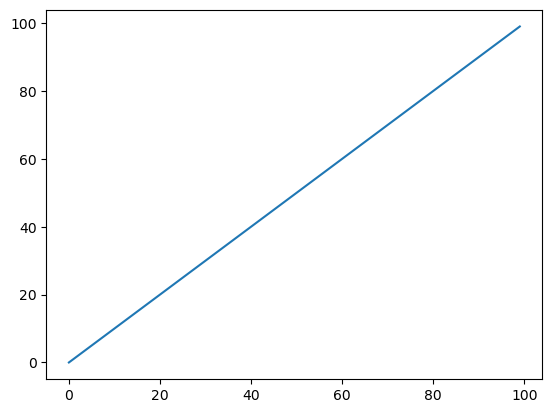

In [4]:
plt.plot(x) 
plt.show()

Since we passed in only one `np.array`, it assumed our data to be y-values and, in the absence of an x-values list, used [0, 1, 2, 3, ..., 100].

We can also pass in two arrays to `plt.plot` to plot x and y values. It will use the first array as x-values and the second as y-values.

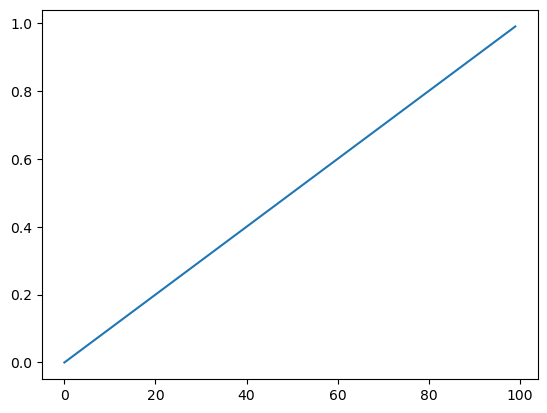

In [5]:
x = np.arange(0, 100)
y = np.arange(0, 1, 0.01)

plt.plot(x, y)
plt.show()

**Note:** When you pass in two arrays to `plt.plot`, their lengths must match. Here, our arrays both contain 100 values.

You can plot multiple curves on the same plot by simply calling `plt.plot` multiple times before calling `plt.show()`.

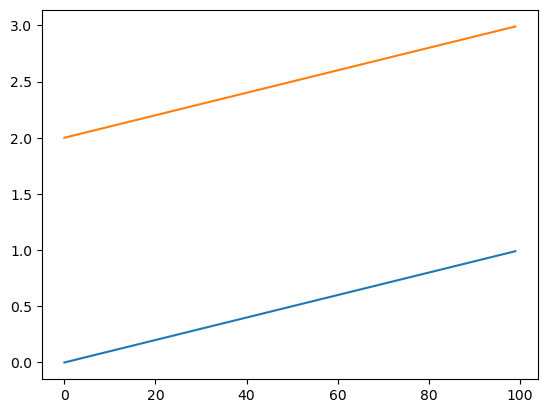

In [6]:
x = np.arange(0, 100)
y1 = np.arange(0, 1, 0.01)
y2 = np.arange(2, 3, 0.01)

plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

Right now, it's hard to tell by glancing which line belongs to which data. We can add labels and show a legend to make it easier to tell them apart

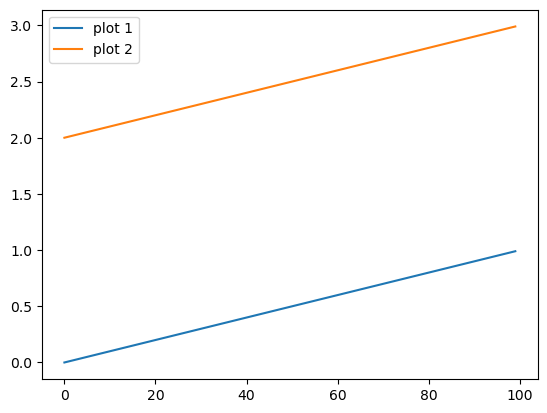

In [7]:
plt.plot(x, y1, label="plot 1")
plt.plot(x, y2, label="plot 2")
plt.legend()
plt.show()

We can also add labels to the axes and a title. Notice that we apply these customizations prior to calling `plt.show()`.

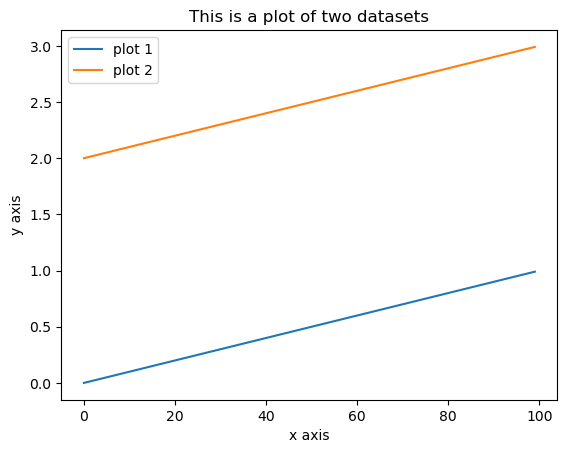

In [8]:
plt.plot(x, y1, label="plot 1")
plt.plot(x, y2, label="plot 2")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("This is a plot of two datasets")
plt.legend()
plt.show()

You can also change the line type (using `linestyle` or `ls`) and color (using `color` or `c`) in the `plt.plot` function.

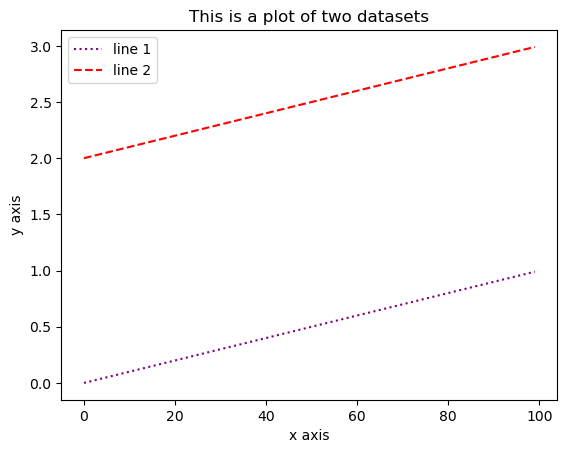

In [9]:
plt.plot(x, y1, linestyle=":", color="purple", label="line 1")
plt.plot(x, y2, ls="--", c="red", label="line 2")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("This is a plot of two datasets")
plt.legend()
plt.show()

You can change the scaling of either axis by using `xlim` or `ylim` and passing in the minimum and maximum values for that axis.

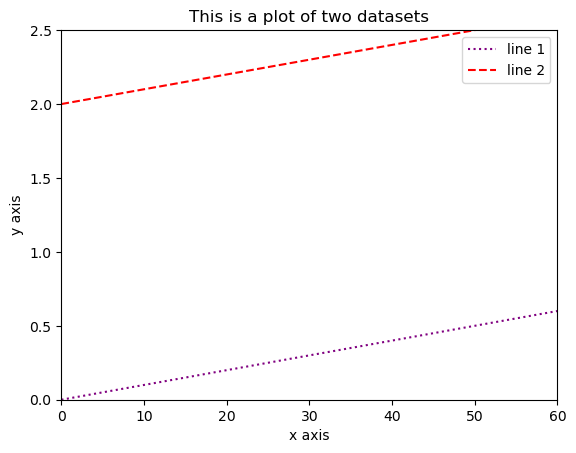

In [10]:
plt.plot(x, y1, linestyle=":", color="purple", label="line 1")
plt.plot(x, y2, ls="--", c="red", label="line 2")
plt.xlim(0, 60)
plt.ylim(0, 2.5)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("This is a plot of two datasets")
plt.legend()
plt.show()

You can see that this is the same plot as above, except it's more zoomed in because we changed the axes.

### Different Types of Plots <a id="different-types-of-plots"></a>

We can also create scatter plots using `plt.scatter`. This function takes in x and y values, and you can customize the size and color of the points using the `s` and `c` arguments, respectively. `marker` can be used to change the shape of the points.

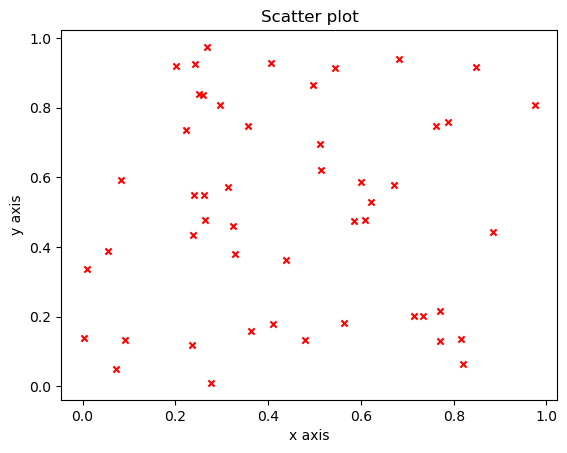

In [11]:
# Scatter plot
x = np.random.rand(50)
y = np.random.rand(50)
plt.scatter(x, y, c="red", s=20, marker="x")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Scatter plot")
plt.show()

We can also create box plots using `plt.boxplot`. This function takes in a list of data arrays and plots them as box plots. You can add labels to the individual box plots for more customizability.

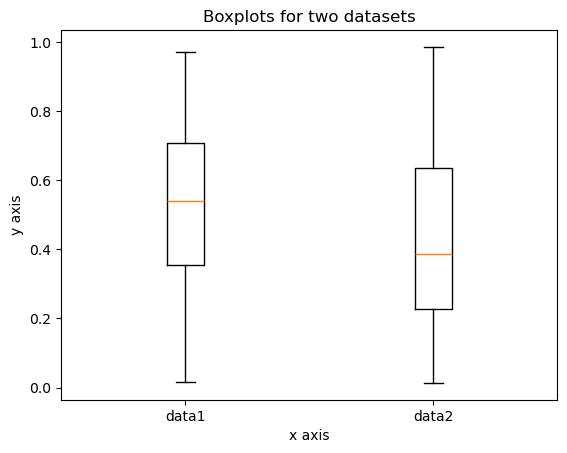

In [12]:
# Multiple boxplots
data1 = np.random.rand(50)
data2 = np.random.rand(50)
plt.boxplot([data1, data2])
plt.ylabel("y axis")
plt.xlabel("x axis")
plt.xticks([1, 2], ["data1", "data2"])
plt.title("Boxplots for two datasets")
plt.show()

We can also create histograms using `plt.hist`. This function takes in a list of data arrays and plots them as histograms. You can customize the number of bins and the color of the bars.

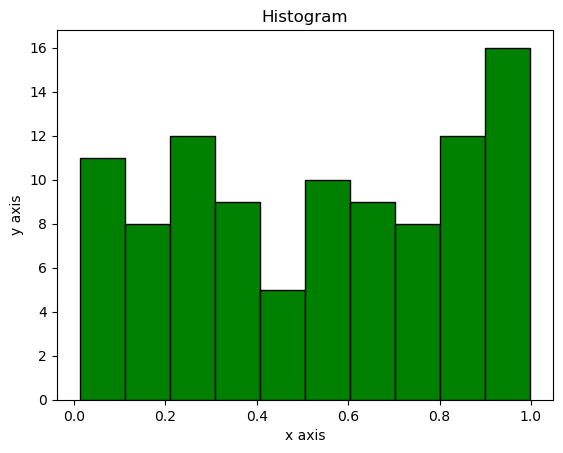

In [13]:
# Histogram
data = np.random.rand(100)
plt.hist(data, bins=10, facecolor='green', edgecolor='black')
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Histogram")
plt.show()

### `matplotlib` Figure and Axes <a id="matplotlib-axes"></a>

In `matplotlib`, there is a distinction between a `Figure` object and something called an `Axes` object (see image below). The figure contains your plots and can be made up of more than one plot. Each plot is inside of an axes object. In all examples so far, we've only had one plot so there was only one axes object inside of each figure. Think of the figure like a sheet of paper. We can draw multiple plots inside of boxes on the paper. The boxes represent the axes object. 
![Representation of the figure structure in matplotlib](matplotlib_figure.png)

Figure from: https://towardsdatascience.com/what-are-the-plt-and-ax-in-matplotlib-exactly-d2cf4bf164a9

In order to create a figure with multiple subplots dynamically, you can use a `for` loop. The `plt.subplots` function creates a figure and a grid of subplots. You can specify the number of rows and columns in the grid. The function returns a figure object and an array of axes objects. You can then iterate through the axes objects to plot on each subplot. Notice that we call the scatter plot function on the axes object, not on `plt`.

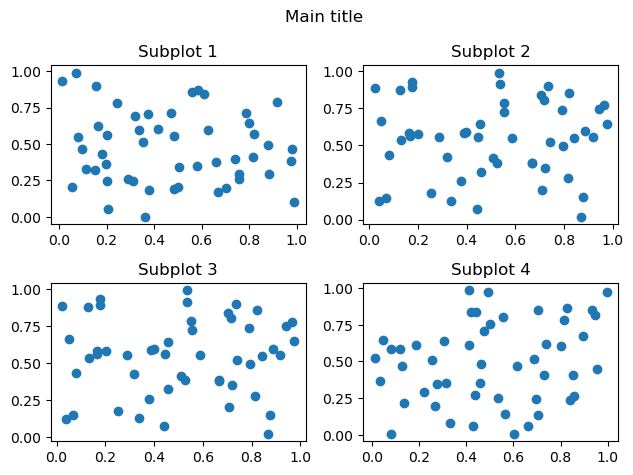

In [14]:
num_rows = 2
num_cols = 2
count = 0

x_data = [np.random.rand(50) for _ in range(num_rows * num_cols)]
y_data = [np.random.rand(50) for _ in range(num_rows * num_cols)]

fig, axes = plt.subplots(num_rows, num_cols)
for row_num in range(num_rows):
    for col_num in range(num_cols):
        count += 1
        ax = axes[row_num][col_num]
        ax.scatter(x_data[row_num + col_num], y_data[row_num + col_num])
        ax.set_title(f'Subplot {count}')
fig.suptitle('Main title')
fig.tight_layout()
plt.show()

Another way you can do this is to use a different command called `plt.subplot`. The format is `plt.subplot(number of rows, number of columns, plot number)` where the plot number starts at 1 and increments left to right, top to bottom. This command creates a new axes object and sets it as the current axes object. You can then plot on this axes object. In the end, you can call `plt.show()` to display the figure.

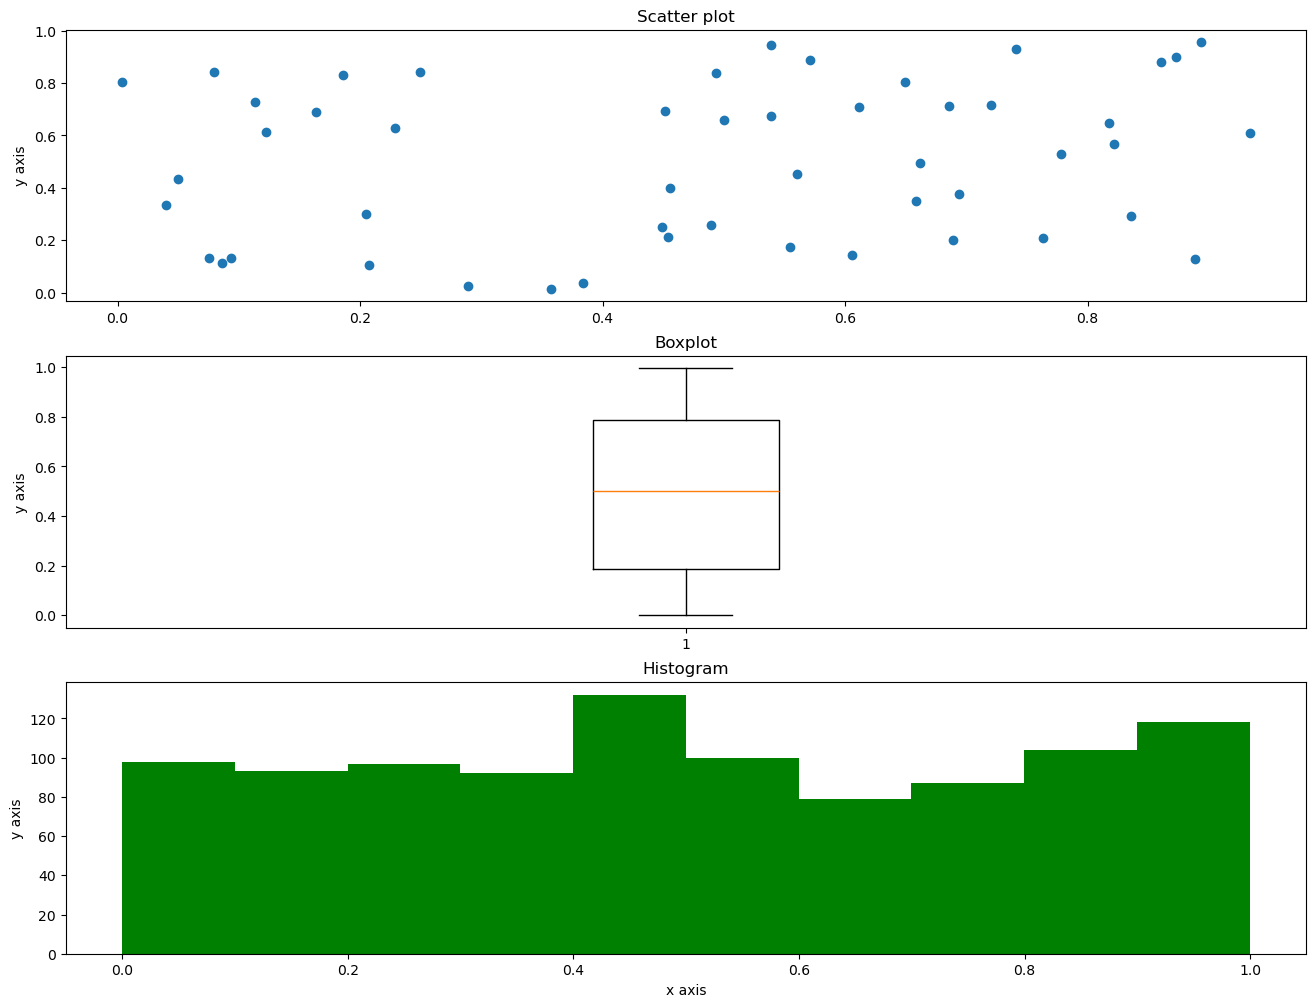

In [15]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 1, 1)
x = np.random.rand(50)
y = np.random.rand(50)
plt.scatter(x, y)
plt.ylabel("y axis")
plt.title("Scatter plot")

plt.subplot(3, 1, 2)
data = np.random.rand(50)
plt.boxplot(data)
plt.ylabel("y axis")
plt.title("Boxplot")

plt.subplot(3, 1, 3)
data = np.random.rand(1000)
plt.hist(data, bins=10, facecolor='green')
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Histogram")

plt.show()

### In-Class Exercises <a id="in-class-exercises"></a>

For these exercises, we'll be using the famous iris flower dataset (https://www.kaggle.com/datasets/arshid/iris-flower-dataset). This dataset contains 150 samples of iris flowers, each with four features: sepal length, sepal width, petal length, and petal width. The flowers belong to one of three species: setosa, versicolor, or virginica.

In [ ]:
!wget https://raw.githubusercontent.com/How-to-Learn-to-Code/python-class/master/Lesson_7_Plotting/IRIS.csv

Use `pandas` to read in the IRIS.csv dataset from the file you just downloaded. (You might need to import `pandas`)

In [16]:
import pandas as pd
iris_info = pd.read_csv('IRIS.csv')
iris_info

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Extract the petal_length and petal_width columns and store them in their own variables `petal_length` and `petal_width`.

In [17]:
petal_length = iris_info[["petal_length"]]
petal_length

,petal_length
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4
...,...
145,5.2
146,5.0
147,5.2
148,5.4


In [18]:
petal_width = iris_info[["petal_width"]]
petal_width

,petal_width
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2
...,...
145,2.3
146,1.9
147,2.0
148,2.3


Use `matplotlib` to make a scatter plot of petal length vs petal width. Add an appropriate title and x- and y-axis labels.

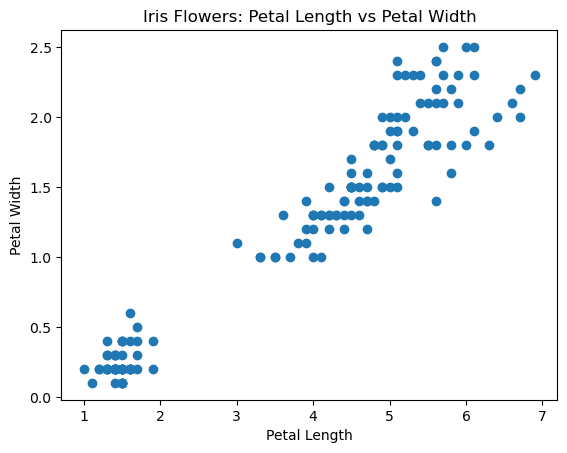

In [19]:
plt.scatter(petal_length, petal_width)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Iris Flowers: Petal Length vs Petal Width")
plt.show()

As mentioned earlier, the iris dataset contains three species of flowers. Use `pandas` to extract the species column and store it in a variable `species`.

In [20]:
species = iris_info[["species"]]

We can use the `unique` method to get the unique values in the species column. Use this method to get the unique species in the dataset. Store the result in a variable `unique_species`.

In [21]:
unique_species = species["species"].unique()
unique_species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Use a `for` loop to create a scatter plot of petal length vs petal width for each species. Use a different color for each species. Add an appropriate title and x- and y-axis labels. (Hint: You can get subsets of the dataframe by using `df[df['column_name'] == value]`)

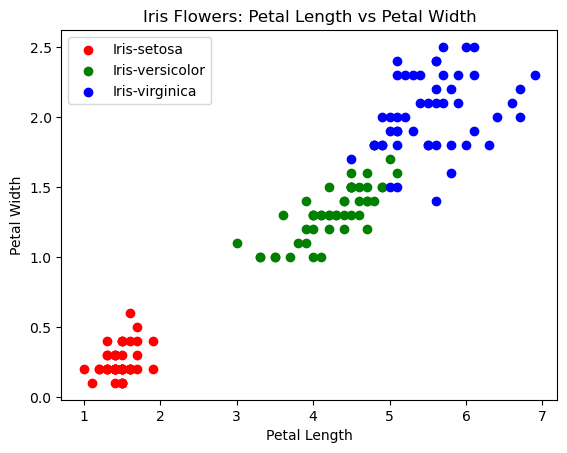

In [22]:
species_dfs = [iris_info[iris_info["species"] == species] for species in unique_species]
species_colors = ["red", "green", "blue"]

for species_df, species_color in zip(species_dfs, species_colors):
    plt.scatter(species_df["petal_length"], species_df["petal_width"], c=species_color)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Iris Flowers: Petal Length vs Petal Width")
plt.legend(unique_species)
plt.show()

If you want more practice, there are a few basic exercises [here](https://www.w3resource.com/graphics/matplotlib/basic/index.php). There is a built-in text editor for you to use and solutions are given. 

If you want more challenging exercises, you can try out the plotting exercise [here](https://pynative.com/python-matplotlib-exercise/). The company sales dataset they use is included for download on the page and it has you make a few plot types we didn't cover. They also give solutions, but you'll have to use your own text editor (you could make a notebook in Colab!). 